Training Step: 29  | total loss: 0.72310 | time: 5.990s
| Adam | epoch: 015 | loss: 0.72310 - acc: 0.5517 -- iter: 64/77
Training Step: 30  | total loss: 0.69705 | time: 17.725s
| Adam | epoch: 015 | loss: 0.69705 - acc: 0.5668 | val_loss: 0.68534 - val_acc: 0.5000 -- iter: 77/77
--


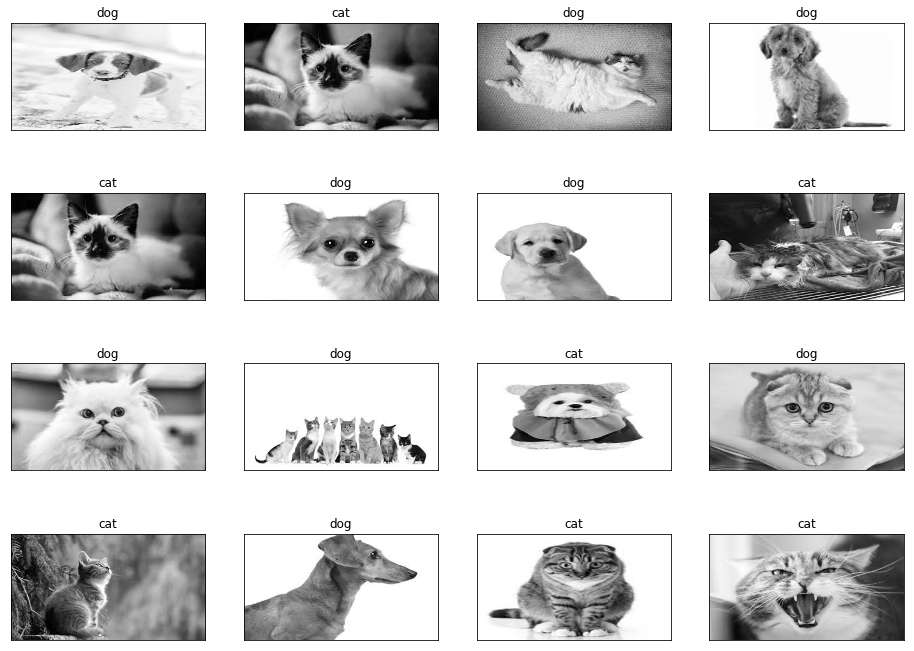

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 10 19:42:51 2019

@author: Ravi Sai Srinivas
"""

import cv2

import numpy as np

import os

from random import shuffle

from tqdm import tqdm

import tensorflow as tf

import matplotlib.pyplot as plt

import tflearn

from tflearn.layers.conv import conv_2d, max_pool_2d

from tflearn.layers.core import input_data, dropout, fully_connected

from tflearn.layers.estimator import regression

TRAIN_DIR='110_train'

TEST_DIR='110_test'

IMG_SIZE=1000

IMG_SIZE1=550

rate=0.001

Model_name='Recognition'

def CreateLabel(image_name):

    word_label=image_name.split('.')[0][0]

    if word_label=='d':

        return np.array([0,1])

    elif word_label=='c':

        return np.array([1,0])

def CreateTrainData():

    TrainingData=[]

    for img in tqdm(os.listdir(TRAIN_DIR)):

        path=os.path.join(TRAIN_DIR,img)

        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)

        img_data=cv2.resize(img_data, (IMG_SIZE,IMG_SIZE1))

        TrainingData.append([np.array(img_data),CreateLabel(img)])

    shuffle(TrainingData)

    np.save('train_data.npy', TrainingData)

    return TrainingData

    

def CreateTestData():

    TestingData=[]

    for img in tqdm(os.listdir(TEST_DIR)):

        path=os.path.join(TEST_DIR,img)

        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)

        img_data=cv2.resize(img_data, (IMG_SIZE,IMG_SIZE1))

        TestingData.append([np.array(img_data),CreateLabel(img)])

    shuffle(TestingData)

    np.save('test_data.npy',TestingData)

    return TestingData



train_data=CreateTrainData()

test_data=CreateTestData()

train=train_data[0:-30]

test=train_data[-30:]

X_train=np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE1,1)

Y_train=[i[1] for i in train]

X_test=np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE1,1)

Y_test=[i[1] for i in test]



tf.reset_default_graph()

convnet = input_data(shape=[None,IMG_SIZE,IMG_SIZE1,1],name='input')

convnet = conv_2d(convnet, 32,5, activation='relu')

convnet = max_pool_2d(convnet,5)

convnet = conv_2d(convnet, 64,5, activation='relu')

convnet = max_pool_2d(convnet,5)

convnet = conv_2d(convnet, 128,5, activation='relu')

convnet = max_pool_2d(convnet,5)

convnet = conv_2d(convnet, 64,5, activation='relu')

convnet = max_pool_2d(convnet,5)

convnet = conv_2d(convnet, 32,5, activation='relu')

convnet = max_pool_2d(convnet,5)

convnet = fully_connected(convnet, 1024,activation='relu')

convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet,2,activation='softmax')

convnet = regression(convnet,optimizer='adam', learning_rate=rate,loss='categorical_crossentropy',name='Foodgrains')

model= tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)

model.fit(X_train,Y_train,n_epoch=15,validation_set =(X_test,Y_test), snapshot_step=500,show_metric=True,run_id=Model_name)

fig=plt.figure(figsize=(16,12))

for num,data in enumerate(test_data[:16]):

    img_num=data[1]

    img_data=data[0]

    y=fig.add_subplot(4,4,num+1)

    orig=img_data

    data=img_data.reshape(IMG_SIZE,IMG_SIZE1,1) 

    model_out=model.predict([data])[0]

    if np.argmax(model_out)==1:

        str_label='dog'

    else:

        str_label='cat'

    y.imshow(orig, cmap='gray')

    plt.title(str_label)

    y.axes.get_xaxis().set_visible(False)

    y.axes.get_yaxis().set_visible(False)

plt.show()

